## Observations and Insights 

1: There was an even sample of female and male gender mice used in the study.

2: For the drug Capomulin, the mouse weight and tumor volume have a correlation value of 0.84, indicating a strong correlation between the two variables.
    
3: When randomly selecting a mouse treated by Capomulin, the mouse showed the tumor volume decreased as the time point increased.

4: Through producing the quartile range and generating a Box and Whisker plot it is evident that there is one outlier for the drug Infubinol.

In [1]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files: import csv
mouse_metadata_path = "Pymaceuticals_data_Mouse_metadata.csv"
study_results_path = "Pymaceuticals_data_Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
combinedata = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")
# Display the data table for preview
combinedata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
num_of_rows=combinedata.shape
print(f"Total number of mice: {num_of_rows}")
uniquemice=combinedata['Mouse ID'].nunique()
print(f"Total number of unique mice: {uniquemice}")

Total number of mice: (1893, 8)
Total number of unique mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
id_count=combinedata.groupby("Mouse ID")[["Timepoint"]].count()

find_duplicate=id_count.loc[id_count["Timepoint"]>10]
find_duplicate

,Timepoint
Mouse ID,
g989,13


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse=combinedata.loc[combinedata["Mouse ID"]=="g989"]
duplicate_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
metadata_df=combinedata.drop(range(860, 872))
check=metadata_df.loc[metadata_df["Mouse ID"] == "g989"]
check

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
872,g989,35,62.57088,2,Propriva,Female,21,26


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_id_check=metadata_df["Mouse ID"].unique()
len(mice_id_check)

249

## Summary Statistics

In [7]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Creating multiple series and putting them all together at the end.
summarydata = metadata_df[["Drug Regimen", "Tumor Volume (mm3)"]]
groupbydata = summarydata.groupby(["Drug Regimen"])

summarydf = pd.DataFrame({
    "Mean": groupbydata["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": groupbydata["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Variance": groupbydata["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Std Deviation": groupbydata["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": groupbydata["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)})
summarydf

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.71,44.26,6.65,0.55
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
summary_df=metadata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg({"mean","median","var","std","sem"})
summary_df=summary_df.round(2)
summary_df.columns = ['Standard Deviation','Variance','SEM','Median','Mean']
summary_df=summary_df[['Mean','Median','Variance','Standard Deviation','SEM']]
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.71,44.26,6.65,0.55
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

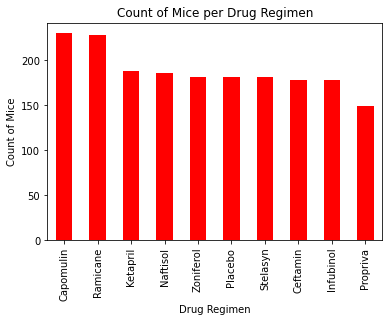

<Figure size 432x216 with 0 Axes>

In [10]:
#BAR PLOT (pandas) showing the total number of mice for each treatment throughout the course of the study. 
groupbydata=metadata_df["Drug Regimen"].value_counts()
groupbydata.plot(kind="bar",facecolor="red")
plt.title("Count of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Mice")
plt.figure(figsize=(6, 3))
plt.show()

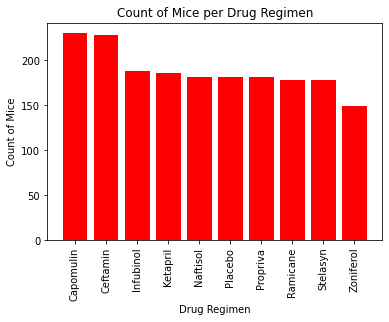

<Figure size 432x216 with 0 Axes>

In [11]:
#BAR PLOT (pyplot) showing the total number of mice for each treatment throughout the course of the study. 
xAxis = np.arange(len(summarydf))
tickLocations = [value for value in xAxis]

plt.bar(xAxis, groupbydata, facecolor='red')
plt.xticks(tickLocations, list(summarydf.index), rotation="vertical") 
plt.title("Count of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Mice")
plt.figure(figsize=(6, 3))
plt.show()

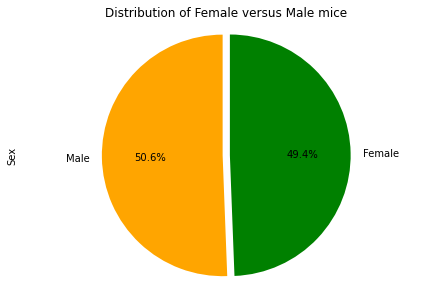

In [12]:
#PIE CHART (pandas) showing distribution of female versus male mice
gendercount = combinedata["Sex"].value_counts()

plt.figure()
explode=(0.03,0.03)
colors=["Orange","Green"]
gendercount.plot(kind="pie", explode=explode, autopct='%1.1f%%', startangle=90, colors=colors)
plt.tight_layout()
plt.axis("equal")
plt.title("Distribution of Female versus Male mice")
plt.show()

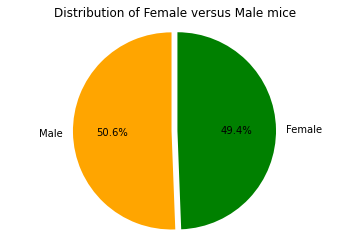

In [13]:
#PIE CHART (pyplot) showing distribution of female versus male mice
plt.figure()
explode = (0.03,0.03)
colors = ["orange","green"]
plt.pie(gendercount.values, explode=explode, labels=gendercount.index.values, colors=colors,autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.title("Distribution of Female versus Male mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_drugs = combinedata[combinedata['Drug Regimen'].isin(four_drug_list)]
four_drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [15]:
#agg the dataframes, 
four_last_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)
four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)

In [16]:
counter = 0

# Do quartile calculations for each drug
for drug in four_drug_list:
    quartiles = four_last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data:")
    print(f"Lower quartile is: {lowerq}")
    print(f"Upper quartile is: {upperq}")
    print(f"Interquartile range is: {iqr}")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

--------------------------------------------------------
Capomulin IQR data:
Lower quartile is: 32.38
Upper quartile is: 40.16
Interquartile range is: 7.78
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data:
Lower quartile is: 31.56
Upper quartile is: 40.66
Interquartile range is: 9.1
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data:
Lower quartile is: 54.05
Upper quartile is: 65.53
Interquartile range is: 11.48
Values below 36.83 for Infubinol could be outliers.
Values above 82.75 for Infubinol could be outliers.
--------------------------------------------------------
Ceftamin IQR data:
Lower quartile is: 48.72
Upper quartile is: 64.3
Interquartile range is: 15.58
Values below 25.35 for Ceftamin could be outliers.
Values above 87.6

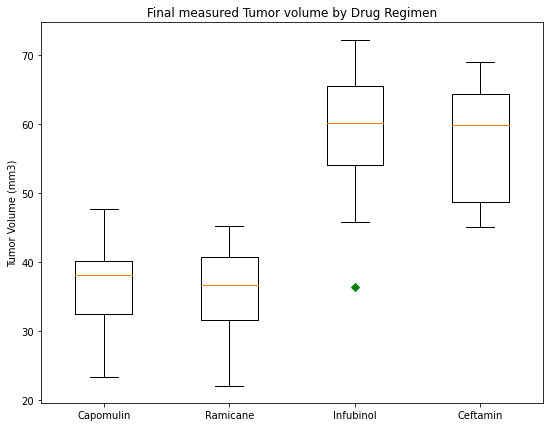

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_list=[]
for drug in four_drug_list:
    boxplot_list.append(list(four_last_tumor_unstack[drug].dropna()))

fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],four_drug_list)
plt.show()

## Line and Scatter Plots

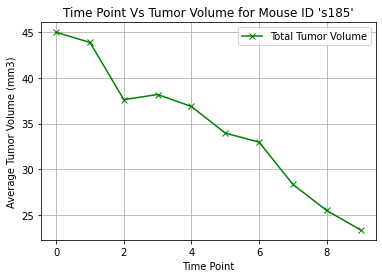

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
lineplot = combinedata[(combinedata["Drug Regimen"] == "Capomulin") & (combinedata["Mouse ID"] == "s185")]
lineplot = lineplot.groupby(["Drug Regimen", "Timepoint"])
lineplotdf = lineplot["Tumor Volume (mm3)"].mean().to_frame()
lineplotindexdf = lineplotdf.unstack(0)
lineplotdf = lineplotindexdf["Tumor Volume (mm3)"]

plt.figure()
tumortotal, = plt.plot(xAxis, lineplotdf["Capomulin"], marker= "x", color="green", label="Total Tumor Volume" )
plt.legend(handles=[tumortotal], loc="best")
plt.title("Time Point Vs Tumor Volume for Mouse ID 's185'")
plt.xlabel("Time Point")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

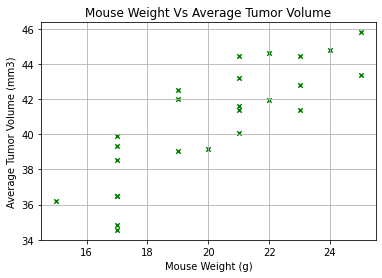

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatterplot = combinedata[(combinedata["Drug Regimen"] == "Capomulin")]
scatterplot = scatterplot[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
groupbydata = scatterplot.groupby(["Mouse ID","Weight (g)"])
scatterplotdf = groupbydata["Tumor Volume (mm3)"].mean().to_frame()
scatterplotdf = scatterplotdf.reset_index()

plt.figure()
scatterplotdf.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind = "scatter", color="green", marker= "x")
plt.title("Mouse Weight Vs Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

## Correlation and Regression

The correlation between Mouse Weight and Tumor Volume for the drug Capomulin is 0.84
Regression equation: y = 0.95x + 21.55


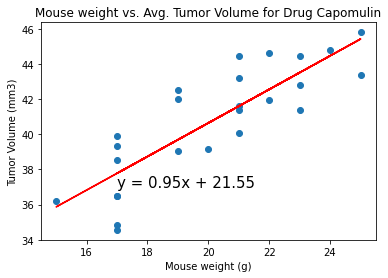

In [20]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Print out the r-squared value along with the plot.
correlation = st.pearsonr(scatterplotdf['Weight (g)'],scatterplotdf["Tumor Volume (mm3)"])

x_values = scatterplotdf['Weight (g)']
y_values = scatterplotdf["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Mouse weight vs. Avg. Tumor Volume for Drug Capomulin")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")

#print/show
print(f"The correlation between Mouse Weight and Tumor Volume for the drug Capomulin is {round(correlation[0],2)}")
print(f"Regression equation: {line_eq}")
plt.show()